In [1]:
import pandas as pd
import numpy as np

In [8]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

In [6]:
df = pd.read_csv('labeled_data_with_metrics.csv')
df = df.drop(columns=['Unnamed: 0'])

In [25]:
df.columns

Index(['distinct_id', 'locationSetting', 'notificationSettings',
       'active_timespan', 'US', 'Facebook', 'Foodie', 'Google', 'Unknown',
       'num_sessions', 'sessions_per_day', 'America/New_York',
       'America/Los_Angeles', 'America/Chicago', 'Asia/Kolkata',
       'America/Denver', 'other_timezone', 'commentAdded', 'commentLength',
       'churned', 'number_ratings', 'SQS', 'avg_session_duration',
       'time_delta_slope', 'session_time_slope', 'time_delta_slope_90',
       'session_time_slope_90'],
      dtype='object')

In [98]:
feature_cols = ['SQS', 'avg_session_duration', 'time_delta_slope', 'session_time_slope',
                'other_timezone', 'US', 'Unknown']
feature_cols = ['SQS', 'avg_session_duration', 'Unknown', 'time_delta_slope', 'US', 'session_time_slope']
X = df[feature_cols] # Features
y = df.churned # Target variable

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [101]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8424942263279446


In [102]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('churn.png')
#Image(graph.create_png())

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[874 191]
 [150 950]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1065
           1       0.83      0.86      0.85      1100

    accuracy                           0.84      2165
   macro avg       0.84      0.84      0.84      2165
weighted avg       0.84      0.84      0.84      2165



In [104]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [105]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8665127020785219


In [106]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [107]:
feature_imp = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)
feature_imp

Unknown                 0.250524
SQS                     0.226137
avg_session_duration    0.193431
time_delta_slope        0.160685
session_time_slope      0.107822
US                      0.061401
dtype: float64

No handles with labels found to put in legend.


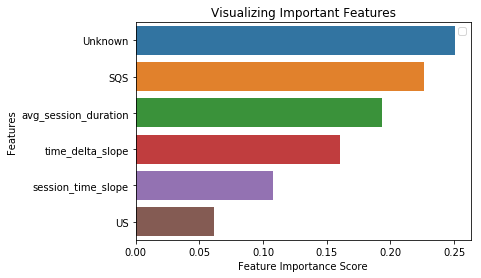

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [109]:
for i in range(5,35):
    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

    # Create Decision Tree classifer object
    clf = DecisionTreeClassifier(max_depth=i)

    # Train Decision Tree Classifer
    clf = clf.fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy at", i, "max depth:",metrics.accuracy_score(y_test, y_pred))

Accuracy at 5 max depth: 0.846189376443418
Accuracy at 6 max depth: 0.8457274826789838
Accuracy at 7 max depth: 0.8526558891454965
Accuracy at 8 max depth: 0.8623556581986144
Accuracy at 9 max depth: 0.8586605080831409
Accuracy at 10 max depth: 0.8595842956120092
Accuracy at 11 max depth: 0.8558891454965358
Accuracy at 12 max depth: 0.854041570438799
Accuracy at 13 max depth: 0.8494226327944573
Accuracy at 14 max depth: 0.8471131639722864
Accuracy at 15 max depth: 0.8309468822170901
Accuracy at 16 max depth: 0.8448036951501154
Accuracy at 17 max depth: 0.8364896073903002
Accuracy at 18 max depth: 0.841108545034642
Accuracy at 19 max depth: 0.8387990762124712
Accuracy at 20 max depth: 0.8401847575057737
Accuracy at 21 max depth: 0.8341801385681293
Accuracy at 22 max depth: 0.8304849884526558
Accuracy at 23 max depth: 0.8314087759815243
Accuracy at 24 max depth: 0.8267898383371824
Accuracy at 25 max depth: 0.8277136258660508
Accuracy at 26 max depth: 0.8267898383371824
Accuracy at 27 max